In [35]:

import os  # Pour interagir avec le système de fichiers (par exemple : accéder aux dossiers, lister les fichiers)
import numpy as np  # Pour les opérations numériques (tableaux, normalisation, etc.)
import matplotlib.pyplot as plt  # Pour afficher les images et les résultats (visualisation)

# Fonctions de Keras pour charger et transformer les images
from tensorflow.keras.preprocessing.image import load_img, img_to_array

# Pour convertir les étiquettes en vecteurs "one-hot" (ex. : classe 2 → [0, 0, 1])
from tensorflow.keras.utils import to_categorical

# Pour diviser les données en ensembles d'entraînement et de test
from sklearn.model_selection import train_test_split

# Pour construire un modèle de réseau de neurones artificiels (ANN)
from tensorflow.keras.models import Sequential  # Modèle linéaire empilant les couches
from tensorflow.keras.layers import Dense  # Couche dense (complètement connectée) du réseau


In [36]:
# Adjusted dataset path for Kaggle
data_dir = '/kaggle/input/chess-pieces/all_resized_into_sub_folders_640'
image_size = (64, 64)   

In [37]:

#Étape 1 : Chargement et prétraitement des images


X = []  # Liste pour stocker les données des images (features)
y = []  # Liste pour stocker les étiquettes (labels)

# Obtenir la liste triée des noms de classes à partir des noms de dossiers
class_names = sorted(os.listdir(data_dir))  # Exemple : ['Black bishop', ..., 'White rook']

# Associer chaque nom de classe à un identifiant numérique
class_to_idx = {name: idx for idx, name in enumerate(class_names)}

# Parcours de chaque dossier correspondant à une classe
for class_name in class_names:
    class_folder = os.path.join(data_dir, class_name)
    for file in os.listdir(class_folder):  # Parcours de chaque image dans le dossier
        img_path = os.path.join(class_folder, file)
        try:
            # Chargement de l'image en niveaux de gris (grayscale) et redimensionnement
            img = load_img(img_path, target_size=image_size, color_mode='grayscale')

            # Conversion de l'image en tableau numpy, aplatissement et normalisation (0 à 1)
            img_array = img_to_array(img).flatten() / 255.0

            # Ajouter les données à X et l'étiquette correspondante à y
            X.append(img_array)
            y.append(class_to_idx[class_name])
        except Exception as e:
            # Afficher un message en cas d'échec de chargement d'une image
            print(f" Échec du chargement {img_path} : {e}")

# Conversion des listes en tableaux numpy pour l'entraînement
X = np.array(X)

# Conversion des étiquettes en one-hot encoding (format requis pour la classification)
y = to_categorical(np.array(y), num_classes=len(class_names))


In [38]:

# Étape 2 : Séparation des données

# On divise les données en deux parties :
# - 80 % pour l'entraînement (X_train, y_train)
# - 20 % pour le test/évaluation (X_test, y_test)
# Le paramètre random_state permet de garder la même répartition à chaque exécution
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [39]:

# Étape 3 : Définition du modèle ANN

model = Sequential([  # Création d'un modèle séquentiel (couche par couche)
    # 1ère couche dense (entrée), avec 256 neurones et fonction d'activation ReLU
    # L'entrée attend un vecteur de taille image_size[0] * image_size[1] (image aplatie)
    Dense(256, input_shape=(image_size[0] * image_size[1],), activation='relu'),

    # 2ème couche cachée, avec 128 neurones et activation ReLU
    Dense(128, activation='relu'),

    # 3ème couche (de sortie), nombre de neurones = nombre de classes (12 ici)
    # Activation softmax pour la classification multiclasse
    Dense(len(class_names), activation='softmax')
])

# Compilation du modèle
# - Optimiseur : Adam (rapide et efficace)
# - Fonction de perte : categorical_crossentropy (adaptée au one-hot encoding)
# - Métrique suivie : précision (accuracy)
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


In [40]:
# Étape 4 : Entraînement du modèle
history = model.fit(
    X_train,                # Données d'entrée
    y_train,                # Étiquettes
    epochs=15,              # Nombre d'époques
    batch_size=32,          # Taille de lot
    validation_split=0.1    # Pourcentage de validation
)
model.save('chess_model.h5')

Epoch 1/15
7/7 ━━━━━━━━━━━━━━━━━━━━ 2s 53ms/step - accuracy: 0.0894 - loss: 3.1829 - val_accuracy: 0.1667 - val_loss: 2.6187
Epoch 2/15
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.0931 - loss: 2.6991 - val_accuracy: 0.1250 - val_loss: 2.6101
Epoch 3/15
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.2095 - loss: 2.3462 - val_accuracy: 0.2083 - val_loss: 2.4734
Epoch 4/15
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.3241 - loss: 2.1842 - val_accuracy: 0.2083 - val_loss: 2.2461
Epoch 5/15
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.3133 - loss: 2.0240 - val_accuracy: 0.1667 - val_loss: 2.2929
Epoch 6/15
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.4363 - loss: 1.8561 - val_accuracy: 0.2500 - val_loss: 2.0446
Epoch 7/15
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.4362 - loss: 1.7377 - val_accuracy: 0.1667 - val_loss: 2.1016
Epoch 8/15
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.5846 - loss: 1.5888 - val_accuracy: 0.2917 - val_loss: 1.9184


In [41]:

#  Étape 5 : Évaluation du modèle


# Évaluation des performances du modèle sur les données de test (non vues pendant l'entraînement)
loss, accuracy = model.evaluate(X_test, y_test)

# Affichage du score de précision obtenu sur l'ensemble de test
print(f"\n✅ Précision sur les données de test : {accuracy:.2f}")


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.2292 - loss: 2.0680 

✅ Précision sur les données de test : 0.25


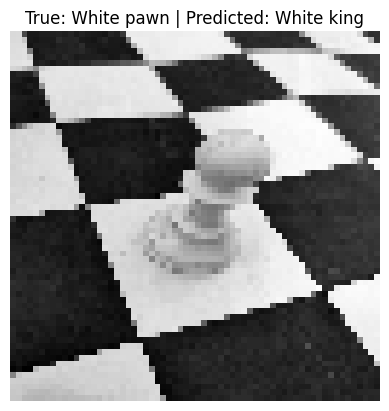

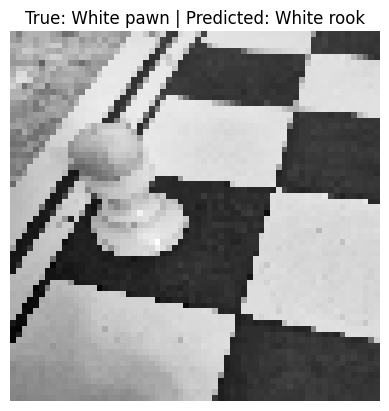

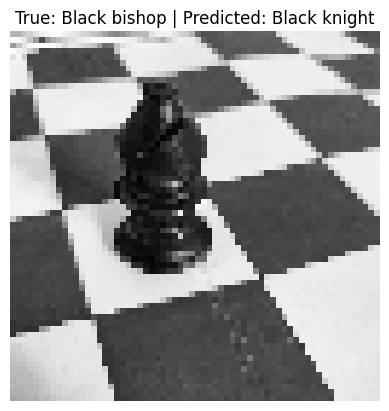

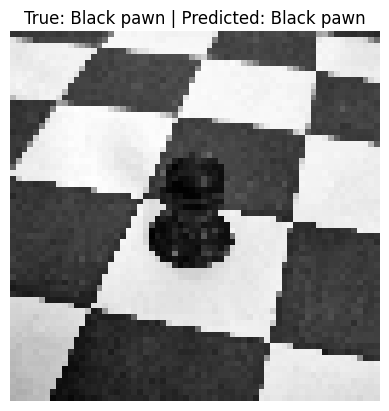

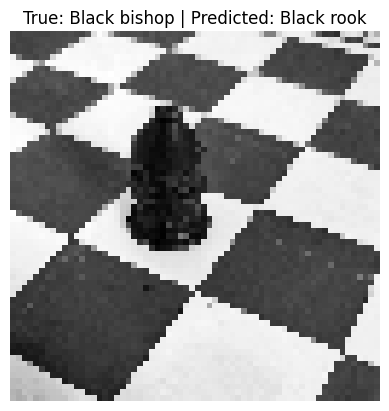

In [42]:
import random

# Pick random samples from X_test
num_samples = 5
indices = random.sample(range(len(X_test)), num_samples)

for i in indices:
    image = X_test[i].reshape(image_size[0], image_size[1])
    true_label = np.argmax(y_test[i])
    prediction = np.argmax(model.predict(X_test[i].reshape(1, -1), verbose=0))

    plt.imshow(image, cmap='gray')
    plt.title(f"True: {class_names[true_label]} | Predicted: {class_names[prediction]}")
    plt.axis('off')
    plt.show()

In [43]:
import matplotlib.pyplot as plt

def plot_training_history(history):
    acc = history.history.get('accuracy')
    val_acc = history.history.get('val_accuracy')
    loss = history.history.get('loss')
    val_loss = history.history.get('val_loss')

    epochs_range = range(len(acc))

    plt.figure(figsize=(12, 5))

    # Précision
    plt.subplot(1, 2, 1)
    plt.plot(epochs_range, acc, label='Training Accuracy')
    plt.plot(epochs_range, val_acc, label='Validation Accuracy')
    plt.title('Training and Validation Accuracy')
    plt.legend()

    # Perte
    plt.subplot(1, 2, 2)
    plt.plot(epochs_range, loss, label='Training Loss')
    plt.plot(epochs_range, val_loss, label='Validation Loss')
    plt.title('Training and Validation Loss')
    plt.legend()

    plt.tight_layout()
    plt.show()


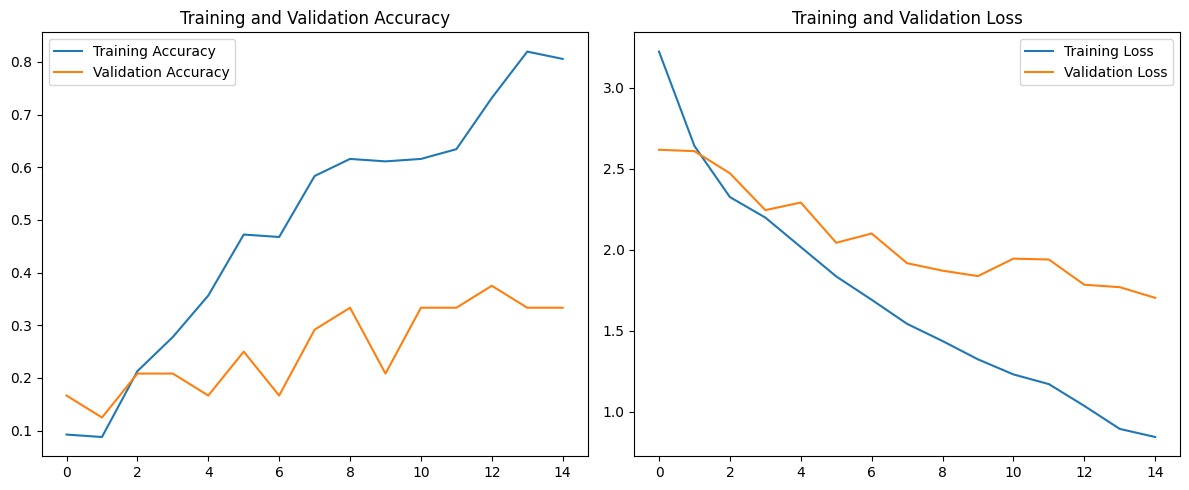

In [44]:
plot_training_history(history)